In [0]:
csv = "https://raw.githubusercontent.com/andybbruno/DataMining/master/kids_train_cleaned.csv?token=AI2AUE27SZJ5WWSI23SMXP26CRCSM"

In [0]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [0]:
df = pd.read_csv(csv)
df.drop(df.columns[0], axis=1, inplace=True)

In [0]:
df_clus = df[['WarrantyCost', 'VehBCost', 'VehOdo']]
df_clus = df_clus[0:20000]

In [0]:
scaler = StandardScaler()

scaled_df = scaler.fit_transform(df_clus.values)

In [0]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

In [0]:
reseuc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit(scaled_df)
resman = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='complete').fit(scaled_df)

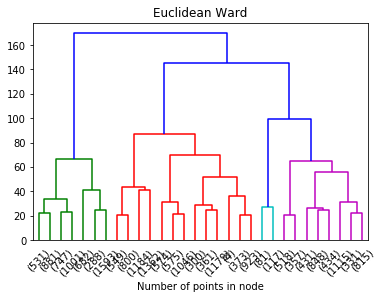

In [17]:
plt.title('Euclidean Ward')
data_dist = pdist(scaled_df, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
dendrogram(data_link, color_threshold=88, truncate_mode='lastp')
plt.xlabel("Number of points in node")
plt.show()

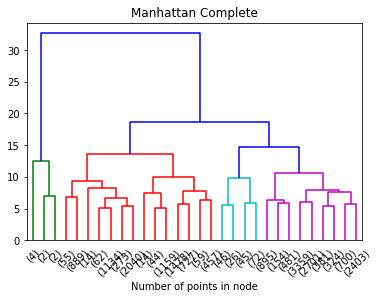

In [18]:
plt.title('Manhattan Complete')
data_dist = pdist(scaled_df, metric='cityblock')
data_link = linkage(data_dist, method='complete', metric='manhattan')
dendrogram(data_link, color_threshold=14, truncate_mode='lastp')
plt.xlabel("Number of points in node")
plt.show()

In [0]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_clus.index.values
cluster_map['cluster'] = reseuc.labels_

In [0]:
bad = []
good = []
for i in range (0,4):
  points = df.iloc[np.where(reseuc.labels_==i)]
  bad.append(len(points[points['IsBadBuy'] == 1]))
  good.append(len(points[points['IsBadBuy'] == 0]))
labels = ['C1', 'C2', 'C3', 'C4']

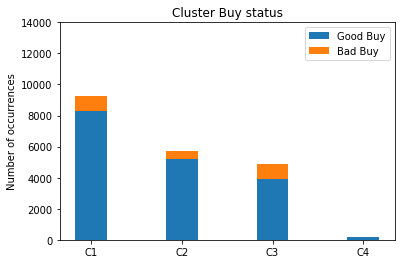

In [22]:
N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, good, width)
p2 = plt.bar(ind, bad, width,
             bottom=good)

plt.ylabel('Number of occurrences')
plt.title('Cluster Buy status')
plt.xticks(ind, labels)
plt.yticks(np.arange(0, 15000, 2000))
plt.legend((p1[0], p2[0]), ('Good Buy', 'Bad Buy'))

plt.show()

In [0]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_clus.index.values
cluster_map['cluster'] = resman.labels_

In [0]:
bad = []
good = []
for i in range (0,4):
  points = df.iloc[np.where(resman.labels_==i)]
  bad.append(len(points[points['IsBadBuy'] == 1]))
  good.append(len(points[points['IsBadBuy'] == 0]))
labels = ['C1', 'C2', 'C3', 'C4']

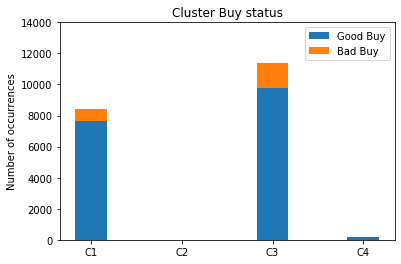

In [25]:
N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, good, width)
p2 = plt.bar(ind, bad, width,
             bottom=good)

plt.ylabel('Number of occurrences')
plt.title('Cluster Buy status')
plt.xticks(ind, labels)
plt.yticks(np.arange(0, 15000, 2000))
plt.legend((p1[0], p2[0]), ('Good Buy', 'Bad Buy'))

plt.show()